# MBTA Bus & Weather - Preliminary Feature Exploration

This notebook walks through the core features in `bus_weather_clean.csv` and produces quick visuals to understand the data before modeling.


## Step 1 ? Imports and configuration

We'll bring in the scientific Python stack and set up a consistent plotting style.


In [14]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(context="notebook", style="whitegrid", palette="crest")
pd.options.display.max_columns = 50


## Step 2 ? Load the full dataset

`bus_weather_clean.csv` is several gigabytes. We now default to loading the entire file; if your environment runs out of memory, set `N_ROWS` back to a smaller number or sample randomly.


In [15]:
DATA_PATH = Path("..") / "bus_weather_clean.csv"
N_ROWS = None  # set to an int to down-sample for lighter-weight exploration

parse_dates = ["service_date", "scheduled_dt", "actual_dt", "event_hour"]

df = pd.read_csv(
    DATA_PATH,
    nrows=N_ROWS,
    parse_dates=parse_dates,
)

print(f"Loaded {len(df):,} rows and {df.shape[1]} columns from {DATA_PATH.name}.")
df.head(100)


C:\Users\yinzhou\AppData\Local\Temp\ipykernel_17536\1072756392.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Loaded 46,405,028 rows and 22 columns from bus_weather_clean.csv.


,service_date,hour,weekday,is_weekend,route_id,direction_id,stop_id,time_point_order,point_type,scheduled_dt,actual_dt,delay_seconds,delay_minutes,event_hour,air_temp_c,rel_humidity_pct,precip_mm,wind_dir_deg,wind_speed_kmh,pressure_hpa,cloud_cover,weather_condition
0,2023-01-01,6,6,1,01,Inbound,110,1,Startpoint,2023-01-01 06:05:00,2023-01-01 06:05:04,4.0,0.066667,2023-01-01 06:00:00,12.2,97.0,0.8,210.0,16.6,1004.1,8.0,Light Rain
1,2023-01-01,6,6,1,01,Inbound,67,2,Midpoint,2023-01-01 06:09:00,2023-01-01 06:06:28,-152.0,-2.533333,2023-01-01 06:00:00,12.2,97.0,0.8,210.0,16.6,1004.1,8.0,Light Rain
2,2023-01-01,6,6,1,01,Inbound,72,3,Midpoint,2023-01-01 06:12:00,2023-01-01 06:08:57,-183.0,-3.050000,2023-01-01 06:00:00,12.2,97.0,0.8,210.0,16.6,1004.1,8.0,Light Rain
3,2023-01-01,6,6,1,01,Inbound,75,4,Midpoint,2023-01-01 06:15:00,2023-01-01 06:12:41,-139.0,-2.316667,2023-01-01 06:00:00,12.2,97.0,0.8,210.0,16.6,1004.1,8.0,Light Rain
4,2023-01-01,6,6,1,01,Inbound,79,5,Midpoint,2023-01-01 06:19:00,2023-01-01 06:16:35,-145.0,-2.416667,2023-01-01 06:00:00,12.2,97.0,0.8,210.0,16.6,1004.1,8.0,Light Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-01-01,12,6,1,01,Inbound,59,7,Midpoint,2023-01-01 12:12:00,2023-01-01 11:58:21,-819.0,-13.650000,2023-01-01 11:00:00,11.7,89.0,0.0,270.0,22.3,1004.1,2.0,Cloudy
96,2023-01-01,12,6,1,01,Inbound,67,2,Midpoint,2023-01-01 12:12:00,2023-01-01 12:05:33,-387.0,-6.450000,2023-01-01 12:00:00,11.7,80.0,0.0,270.0,16.6,1004.4,2.0,Cloudy
97,2023-01-01,12,6,1,01,Inbound,72,3,Midpoint,2023-01-01 12:17:00,2023-01-01 12:09:31,-449.0,-7.483333,2023-01-01 12:00:00,11.7,80.0,0.0,270.0,16.6,1004.4,2.0,Cloudy
98,2023-01-01,12,6,1,01,Inbound,79,5,Midpoint,2023-01-01 12:17:00,2023-01-01 12:08:33,-507.0,-8.450000,2023-01-01 12:00:00,11.7,80.0,0.0,270.0,16.6,1004.4,2.0,Cloudy


## Step 3 ? Inspect column metadata

Take stock of available fields, their data types, and how populated they are.


In [16]:
column_overview = pd.DataFrame({
    "dtype": df.dtypes,
    "non_null": df.notna().sum(),
    "unique": df.nunique(dropna=True),
}).sort_index()

column_overview


,dtype,non_null,unique
actual_dt,datetime64[ns],46405028,29236746
air_temp_c,float64,46405028,108
cloud_cover,float64,46405028,9
delay_minutes,float64,46405028,21416
delay_seconds,float64,46405028,21416
direction_id,object,46405028,2
event_hour,datetime64[ns],46405028,16256
hour,int64,46405028,24
is_weekend,int64,46405028,2
point_type,object,46405028,3


## Step 4 ? Missing values snapshot

Understanding sparsity early helps steer cleaning strategies.


In [17]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Series([], dtype: int64)

## Step 5 ? Feature engineering for analysis

Engineer light-weight helper columns that mirror the modeling pipeline and make visualizations easier.


In [18]:
numeric_candidates = ["hour", "weekday", "is_weekend", "time_point_order"]
for col in numeric_candidates:
    df[col] = pd.to_numeric(df[col], errors="coerce")

angle_rad = np.deg2rad(df["wind_dir_deg"])
df["wind_dir_sin"] = np.sin(angle_rad)
df["wind_dir_cos"] = np.cos(angle_rad)
df["is_delayed"] = (df["delay_minutes"] >= 1).astype(int)
df["delay_minutes_clipped"] = df["delay_minutes"].clip(lower=-10, upper=30)

df[["delay_minutes", "delay_minutes_clipped", "is_delayed", "wind_dir_sin", "wind_dir_cos"]].head()


,delay_minutes,delay_minutes_clipped,is_delayed,wind_dir_sin,wind_dir_cos
0,0.066667,0.066667,0,-0.5,-0.866025
1,-2.533333,-2.533333,0,-0.5,-0.866025
2,-3.050000,-3.050000,0,-0.5,-0.866025
3,-2.316667,-2.316667,0,-0.5,-0.866025
4,-2.416667,-2.416667,0,-0.5,-0.866025


## Step 6 ? Delay distributions

How frequently do trips arrive late and by how much?


C:\Users\yinzhou\AppData\Local\Temp\ipykernel_17536\1943989384.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\yinzhou\AppData\Local\Temp\ipykernel_17536\1943989384.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["On time", "Delayed"])


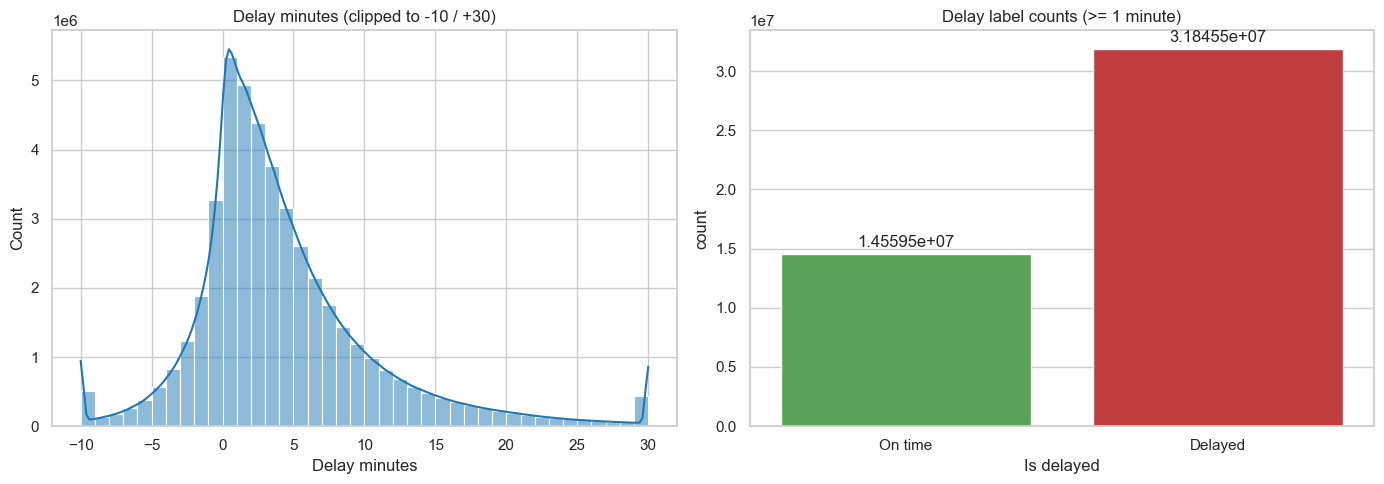

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(
    data=df,
    x="delay_minutes_clipped",
    bins=40,
    kde=True,
    ax=axes[0],
    color="#1f77b4",
)
axes[0].set_title("Delay minutes (clipped to -10 / +30)")
axes[0].set_xlabel("Delay minutes")

sns.countplot(
    data=df,
    x="is_delayed",
    ax=axes[1],
    palette=["#4daf4a", "#d62728"],
)
axes[1].set_title("Delay label counts (>= 1 minute)")
axes[1].set_xlabel("Is delayed")
axes[1].set_xticklabels(["On time", "Delayed"])

for container in axes[1].containers:
    axes[1].bar_label(container, padding=3)

plt.tight_layout()


## Step 7 ? Numeric feature distributions

Scan the shape of key numeric predictors pulled into the modeling pipeline.


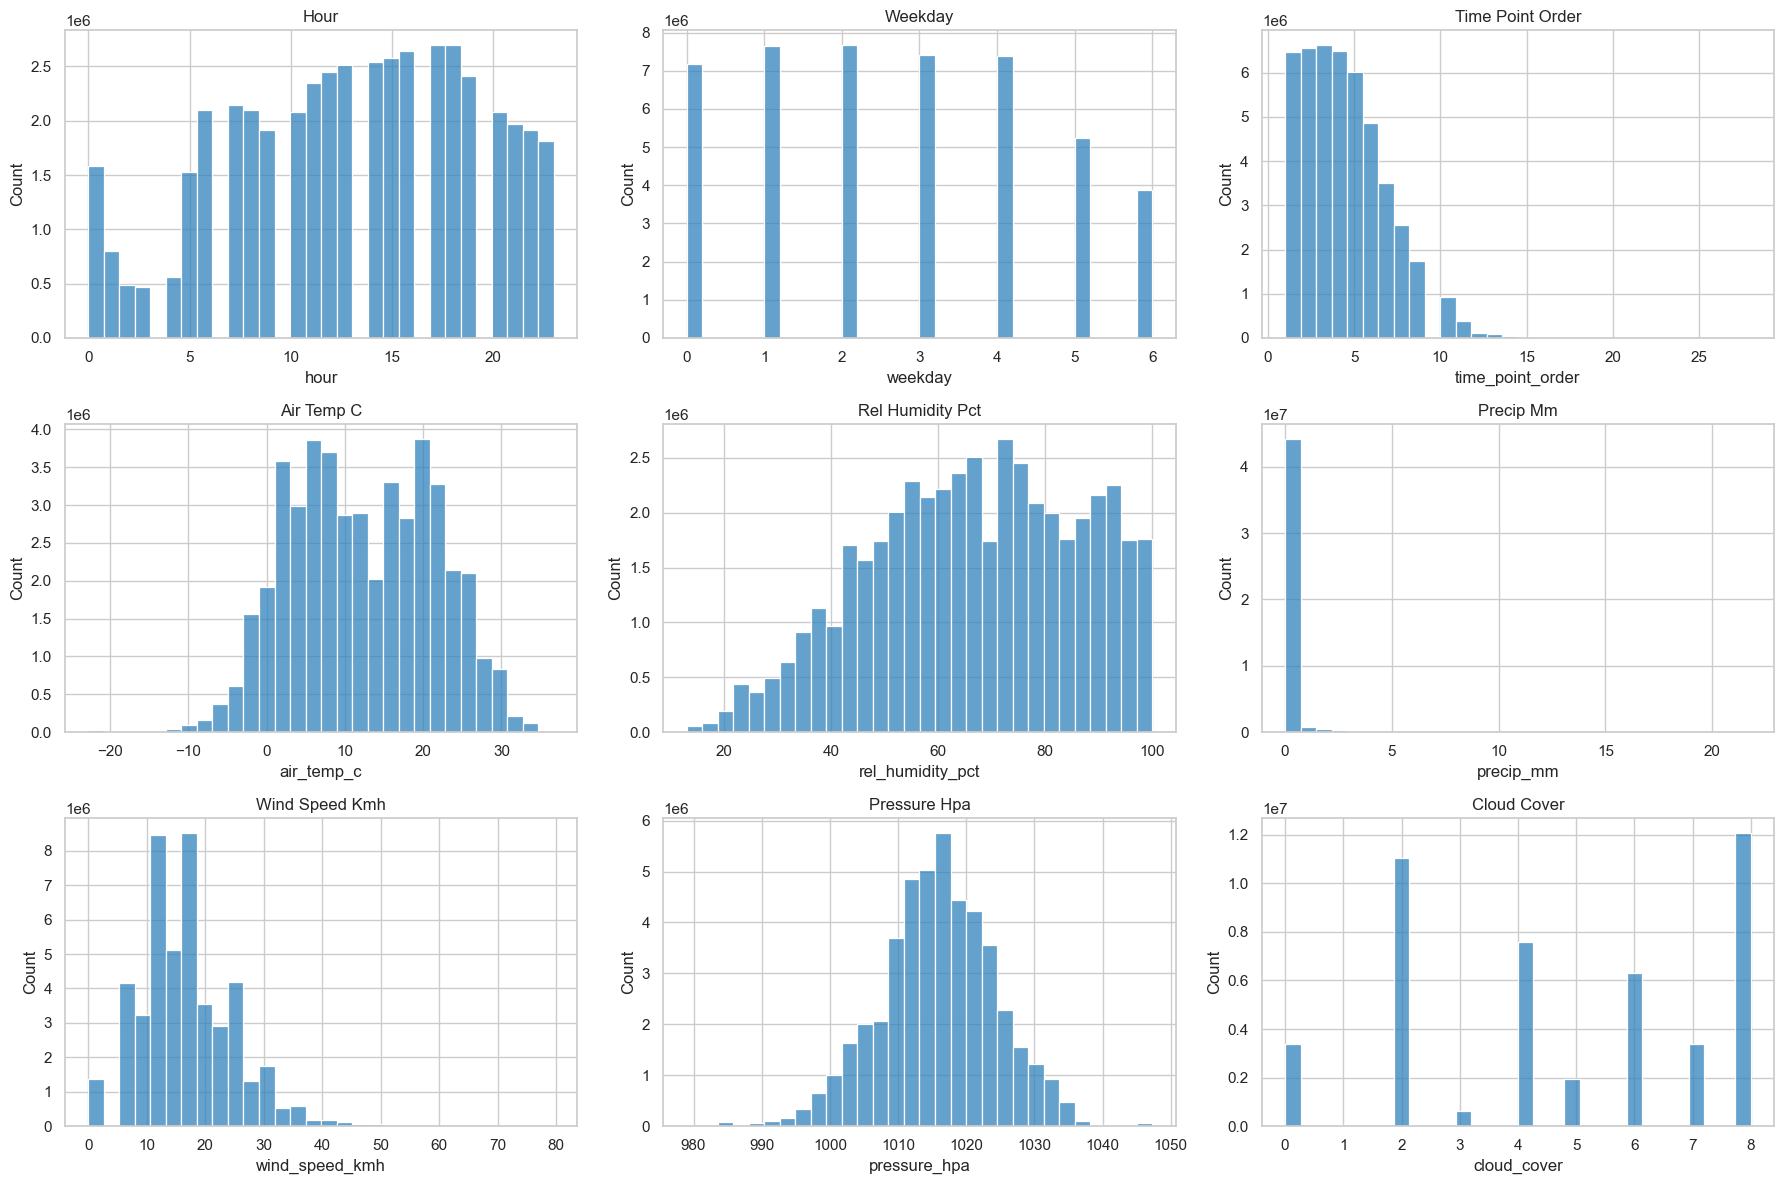

In [20]:
numeric_features = [
    "hour",
    "weekday",
    "time_point_order",
    "air_temp_c",
    "rel_humidity_pct",
    "precip_mm",
    "wind_speed_kmh",
    "pressure_hpa",
    "cloud_cover",
]

rows = int(np.ceil(len(numeric_features) / 3))
fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
axes = axes.flatten()

for ax, col in zip(axes, numeric_features):
    sns.histplot(df[col].dropna(), bins=30, ax=ax, color="#3182bd")
    ax.set_title(col.replace("_", " ").title())

for ax in axes[len(numeric_features):]:
    ax.remove()

plt.tight_layout()


## Step 8 ? Categorical feature frequencies

Identify the dominant categories across routes, stops, and weather conditions.


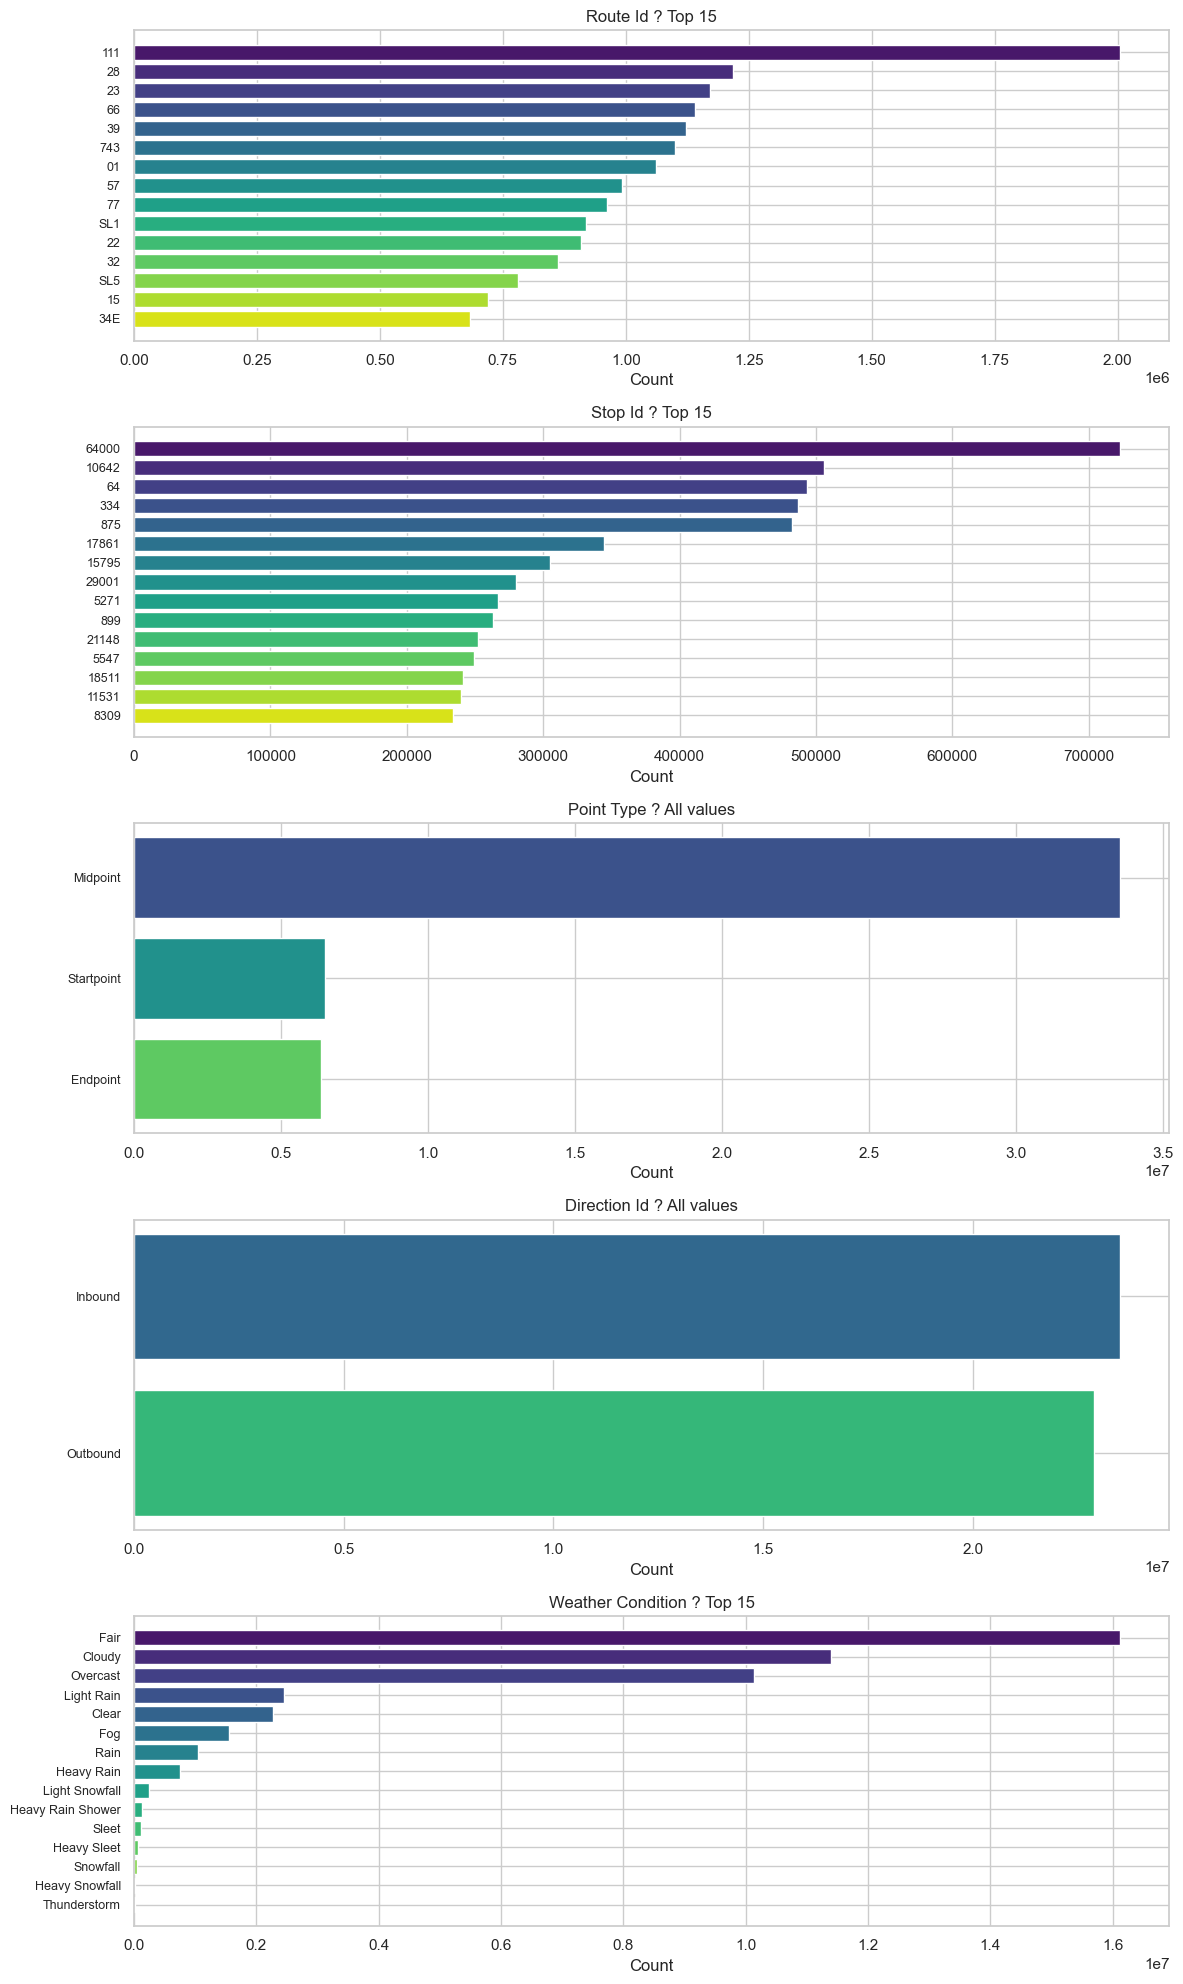

In [21]:
categorical_features = {
    "route_id": 15,
    "stop_id": 15,
    "point_type": None,
    "direction_id": None,
    "weather_condition": 15,
}

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, 4 * len(categorical_features)))

if len(categorical_features) == 1:
    axes = [axes]

for ax, (col, top_n) in zip(axes, categorical_features.items()):
    series = df[col].dropna()
    counts = series.value_counts()
    if top_n:
        counts = counts.head(top_n)
        title_suffix = f"Top {top_n}"
    else:
        title_suffix = "All values"
    palette = sns.color_palette("viridis", len(counts))
    ax.barh(
        counts.index.astype(str)[::-1],
        counts.values[::-1],
        color=palette[::-1],
    )
    ax.set_title(f"{col.replace('_', ' ').title()} ? {title_suffix}")
    ax.set_xlabel("Count")
    ax.set_ylabel("")
    ax.tick_params(axis="y", labelsize=9)

plt.tight_layout()


## Step 9 ? Delay against key drivers

Explore how delays shift with hour of day, weekday, and weather. Hourly stats use the median and drop low-volume hours (<500 trips) so late-night outliers don't dominate.


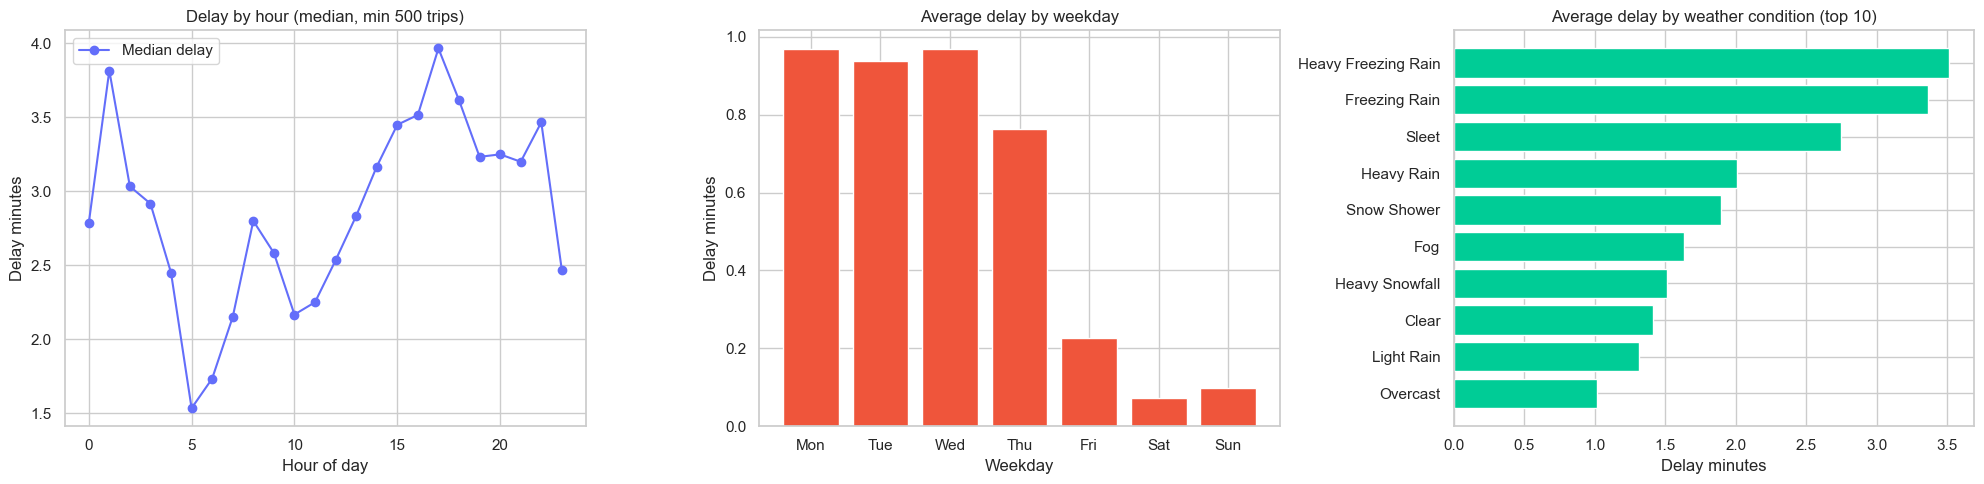

In [25]:
min_trips = 500

hourly_stats = (
    df.loc[df["hour"].notna() & df["delay_minutes"].notna(), ["hour", "delay_minutes"]]
    .assign(hour=lambda d: d["hour"].astype(int))
    .groupby("hour")["delay_minutes"]
    .agg(median_delay="median", trip_count="size")
    .sort_index()
)

hourly_filtered = hourly_stats.loc[hourly_stats["trip_count"] >= min_trips]

weekday_stats = (
    df.loc[df["weekday"].notna() & df["delay_minutes"].notna(), ["weekday", "delay_minutes"]]
    .assign(weekday=lambda d: d["weekday"].astype(int))
    .groupby("weekday")["delay_minutes"]
    .mean()
)

weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
weekday_index = [weekday_labels[i % 7] for i in weekday_stats.index]

weather_delay = (
    df.loc[df["weather_condition"].notna() & df["delay_minutes"].notna(), ["weather_condition", "delay_minutes"]]
    .groupby("weather_condition")["delay_minutes"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].plot(hourly_filtered.index, hourly_filtered["median_delay"], marker="o", color="#636efa", label="Median delay")
axes[0].set_title("Delay by hour (median, min 500 trips)")
axes[0].set_xlabel("Hour of day")
axes[0].set_ylabel("Delay minutes")
axes[0].legend()

axes[1].bar(weekday_index, weekday_stats.values, color="#ef553b")
axes[1].set_title("Average delay by weekday")
axes[1].set_xlabel("Weekday")
axes[1].set_ylabel("Delay minutes")

axes[2].barh(weather_delay.index[::-1], weather_delay.values[::-1], color="#00cc96")
axes[2].set_title("Average delay by weather condition (top 10)")
axes[2].set_xlabel("Delay minutes")
axes[2].set_ylabel("")

plt.tight_layout()
